In [3]:
import pandas as pd

In [4]:
file_path = '/content/random_geohash_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Geohash,Message Count,Density Value,Density
0,v7MgJx,908,91.457740,High
1,M0iGe,5,89.774388,High
2,ecqv04,306,16.942429,Low
3,ZMmxOC,709,89.729272,High
4,SbYgfM,710,48.025962,Low


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [6]:
# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

In [7]:
df.head()

,Geohash,Message Count,Density Value,Density,Geohash_Encoded,Density_Label
0,v7MgJx,908,91.457740,High,2737,0
1,M0iGe,5,89.774388,High,1074,0
2,ecqv04,306,16.942429,Low,1933,1
3,ZMmxOC,709,89.729272,High,1689,0
4,SbYgfM,710,48.025962,Low,1380,1


In [9]:
# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count']]
y = df['Density_Label']

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
accuracy, report

(0.49166666666666664,
 '              precision    recall  f1-score   support\n\n           0       0.47      0.48      0.47       286\n           1       0.51      0.51      0.51       314\n\n    accuracy                           0.49       600\n   macro avg       0.49      0.49      0.49       600\nweighted avg       0.49      0.49      0.49       600\n')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, report_rf


(0.485,
 '              precision    recall  f1-score   support\n\n           0       0.46      0.48      0.47       286\n           1       0.51      0.49      0.50       314\n\n    accuracy                           0.48       600\n   macro avg       0.48      0.48      0.48       600\nweighted avg       0.49      0.48      0.49       600\n')

In [ ]:
from sklearn.svm import SVC

# Train an SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

accuracy_svm, report_svm


(0.515,
 '              precision    recall  f1-score   support\n\n           0       0.49      0.31      0.38       286\n           1       0.53      0.70      0.60       314\n\n    accuracy                           0.52       600\n   macro avg       0.51      0.51      0.49       600\nweighted avg       0.51      0.52      0.50       600\n')

In [ ]:
!pip3 install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(report_xgb)


XGBoost Accuracy: 0.5033333333333333
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.51      0.49       286
           1       0.53      0.50      0.51       314

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:38:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Hyperparameter Tunning

#### 1. Logistic Regression


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-validation Score: 0.9970833333333333
Test Set Accuracy with Best Model: 0.9983333333333333
Classification Report with Best Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



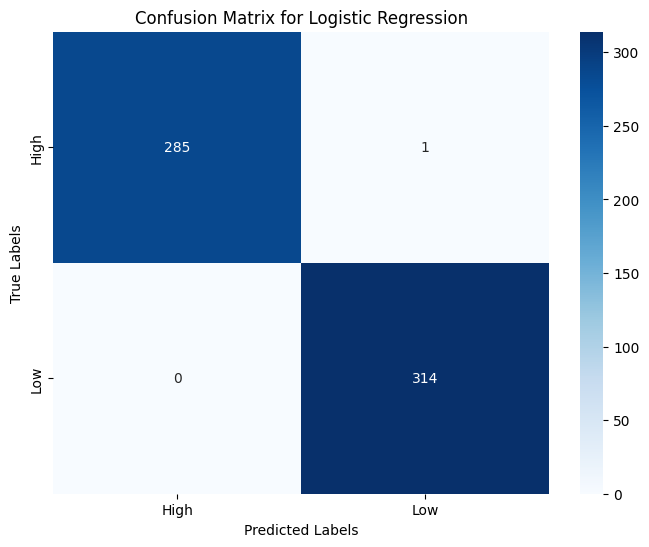

Test Set Accuracy with Loaded Model: 0.9983333333333333
Classification Report with Loaded Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving and loading the model

# Load the dataset
df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y = df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for logistic regression
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],       # Type of regularization (l2 is standard for LogisticRegression)
    'solver': ['lbfgs'],     # Solver for optimization
}

# Set up the GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train and evaluate with the best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Output the results
print("Best Parameters:", best_params)
print("Best Cross-validation Score:", best_score)
print("Test Set Accuracy with Best Model:", accuracy_best)
print("Classification Report with Best Model:\n", report_best)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Save the model using joblib
joblib.dump(best_model, 'logistic_regression_model.pkl')

# Load the model from the file
loaded_model = joblib.load('logistic_regression_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

# Output the results for the loaded model
print("Test Set Accuracy with Loaded Model:", accuracy_loaded)
print("Classification Report with Loaded Model:\n", report_loaded)


#### 2. RandomForest


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
674 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for RandomForest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-validation Score for RandomForest: 0.9995833333333334
Test Set Accuracy with Best RandomForest Model: 1.0
Classification Report with Best RandomForest Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



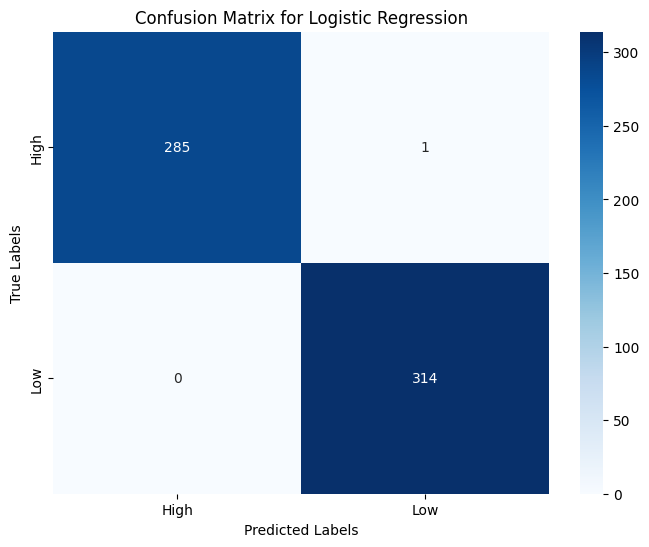

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y = df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150, 200],   # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up the GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Train and evaluate with the best estimator (RandomForest with best hyperparameters)
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Output the results
print("Best Parameters for RandomForest:", best_params_rf)
print("Best Cross-validation Score for RandomForest:", best_score_rf)
print("Test Set Accuracy with Best RandomForest Model:", accuracy_rf)
print("Classification Report with Best RandomForest Model:\n", report_rf)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


##### 3. SVM


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Score for SVM: 0.9979166666666668
Test Set Accuracy with Best SVM Model: 1.0
Classification Report with Best SVM Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



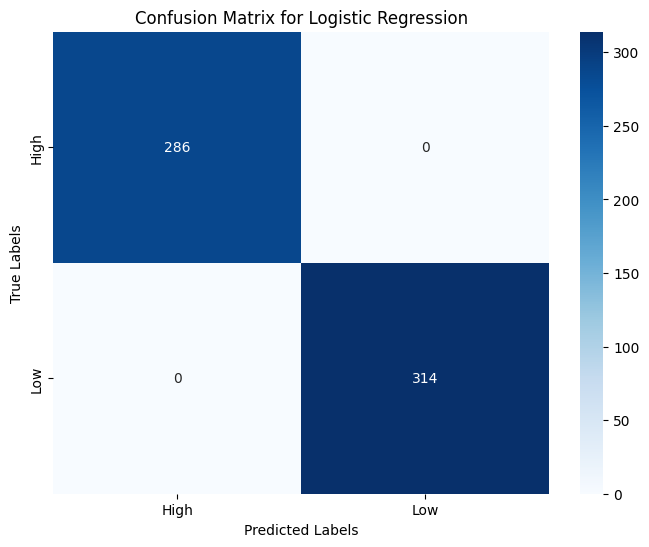

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y = df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for SVM (Support Vector Machine)
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernels
    'gamma': ['scale', 'auto'],    # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Set up the GridSearchCV for SVM
grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,
    n_jobs=-1
)

# Perform grid search
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

# Train and evaluate with the best estimator (SVM with best hyperparameters)
best_svm_model = grid_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the tuned SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Output the results
print("Best Parameters for SVM:", best_params_svm)
print("Best Cross-validation Score for SVM:", best_score_svm)
print("Test Set Accuracy with Best SVM Model:", accuracy_svm)
print("Classification Report with Best SVM Model:\n", report_svm)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

import pickle

with open('model_with_encoders.pkl', 'wb') as f:
    pickle.dump({
        'model': best_svm_model,  # Replace with your trained model
        'geohash_encoder': geohash_encoder,
        'density_encoder': density_encoder
    }, f)


In [28]:
import numpy as np
import pickle

# Prediction function that takes geohash as input and uses data from the model to estimate other features
def predict_density_from_geohash(geohash, model_file='model_with_encoders.pkl'):
    """
    Predict the density label for a given geohash, estimating the other features
    (message count and density value) from the training data.

    Parameters:
    - geohash (str): The geohash input.
    - model_file (str): Path to the saved model file with encoders.

    Returns:
    - str: Predicted density label.
    """
    # Load the model and encoders
    with open(model_file, 'rb') as f:
        saved_data = pickle.load(f)
        model = saved_data['model']
        geohash_encoder = saved_data['geohash_encoder']
        density_encoder = saved_data['density_encoder']

    # Encode the input geohash
    try:
        geohash_encoded = geohash_encoder.transform([geohash])[0]
    except ValueError:
        return f"Error: Geohash '{geohash}' not found in the training data."

    # Retrieve the training data used to train the model (for estimating the other features)
    df = pd.read_csv('/content/random_geohash_dataset.csv')  # Adjust this path if needed

    # Estimate other features by taking the mean (or median) from the dataset
    # You can adjust this strategy depending on your needs
    mean_message_count = df['Message Count'].mean()
    mean_density_value = df['Density Value'].mean()

    # Combine the encoded geohash with the estimated feature values
    input_features = np.array([[geohash_encoded, mean_message_count, mean_density_value]])

    # Predict using the model
    predicted_label_encoded = model.predict(input_features)[0]

    # Decode the predicted label
    predicted_label = density_encoder.inverse_transform([predicted_label_encoded])[0]

    return predicted_label

# Example usage
geohash_input = "ecqv04"
model_file_path = 'model_with_encoders.pkl'

predicted_density = predict_density_from_geohash(geohash_input, model_file=model_file_path)
print(f"The predicted density label for geohash '{geohash_input}' is: {predicted_density}")


The predicted density label for geohash 'ecqv04' is: High


In [29]:
import numpy as np
import pickle
import pandas as pd

# Prediction function that takes geohash as input and uses data from the model to estimate other features
def predict_density_from_geohash(geohash, model_file='model_with_encoders.pkl'):
    """
    Predict the density label for a given geohash, estimating the other features
    (message count and density value) from the training data.

    Parameters:
    - geohash (str): The geohash input.
    - model_file (str): Path to the saved model file with encoders.

    Returns:
    - str: Predicted density label.
    """
    # Load the model and encoders
    with open(model_file, 'rb') as f:
        saved_data = pickle.load(f)
        model = saved_data['model']
        geohash_encoder = saved_data['geohash_encoder']
        density_encoder = saved_data['density_encoder']

    # Check if the geohash is part of the training data
    df = pd.read_csv('/content/random_geohash_dataset.csv')  # Adjust this path if needed
    if geohash not in df['Geohash'].values:
        return f"Error: Geohash '{geohash}' not found in the training data."

    # Encode the input geohash
    try:
        geohash_encoded = geohash_encoder.transform([geohash])[0]
    except ValueError:
        return f"Error: Geohash '{geohash}' not found in the training data."

    # Retrieve the corresponding feature values for the given geohash
    geohash_row = df[df['Geohash'] == geohash].iloc[0]
    message_count_value = geohash_row['Message Count']
    density_value_value = geohash_row['Density Value']

    # Combine the encoded geohash with the feature values from the same row
    input_features = np.array([[geohash_encoded, message_count_value, density_value_value]])

    # Predict using the model
    predicted_label_encoded = model.predict(input_features)[0]

    # Decode the predicted label
    predicted_label = density_encoder.inverse_transform([predicted_label_encoded])[0]

    return predicted_label

# Example usage
geohash_input = "ecqv04"
model_file_path = 'model_with_encoders.pkl'

predicted_density = predict_density_from_geohash(geohash_input, model_file=model_file_path)
print(f"The predicted density label for geohash '{geohash_input}' is: {predicted_density}")


The predicted density label for geohash 'ecqv04' is: High


In [49]:
import numpy as np
import pickle
import pandas as pd

# Prediction function that takes geohash as input and uses the same encoding values as during training
def predict_density_from_geohash(geohash, model_file='model_with_encoders.pkl'):
    """
    Predict the density label for a given geohash, using the same encoding values
    as during the training phase, even if the geohash is not present in the training data.

    Parameters:
    - geohash (str): The geohash input.
    - model_file (str): Path to the saved model file with encoders.

    Returns:
    - str: Predicted density label.
    """
    # Load the model and encoders
    with open(model_file, 'rb') as f:
        saved_data = pickle.load(f)
        model = saved_data['model']
        geohash_encoder = saved_data['geohash_encoder']
        density_encoder = saved_data['density_encoder']

    # Encode the input geohash using the encoder from training
    try:
        geohash_encoded = geohash_encoder.transform([geohash])[0]
    except ValueError:
        # If geohash was not seen during training, assign a new encoding value
        geohash_encoded = len(geohash_encoder.classes_)  # Assign a new encoding value for unseen geohashes

    # We will retrieve default values for message count and density value for the prediction
    # These could be replaced by any default or imputed values you prefer
    # Or you could apply a heuristic to estimate them based on other factors (e.g., mean, median).
    # In this example, we just take average values of the entire dataset.
    df = pd.read_csv('/content/random_geohash_dataset.csv')  # Adjust this path if needed
    message_count_value = df['Message Count'].mean()  # Use the mean of Message Count
    density_value_value = df['Density Value'].mean()  # Use the mean of Density Value

    # Combine the encoded geohash with the feature values from the dataset (or default values)
    input_features = np.array([[geohash_encoded, message_count_value, density_value_value]])

    # Predict using the model
    predicted_label_encoded = model.predict(input_features)[0]

    # Decode the predicted label
    predicted_label = density_encoder.inverse_transform([predicted_label_encoded])[0]

    return predicted_label

# Example usage
geohash_input = "ecqv04"
model_file_path = 'model_with_encoders.pkl'

predicted_density = predict_density_from_geohash(geohash_input, model_file=model_file_path)
print(f"The predicted density label for geohash '{geohash_input}' is: {predicted_density}")


The predicted density label for geohash 'ecqv04' is: High


##### 4. RandomForest - RandomSearchCV


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters for RandomForest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 166}
Best Cross-validation Score for RandomForest: 0.9995833333333334
Test Set Accuracy with Best RandomForest Model: 1.0
Classification Report with Best RandomForest Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



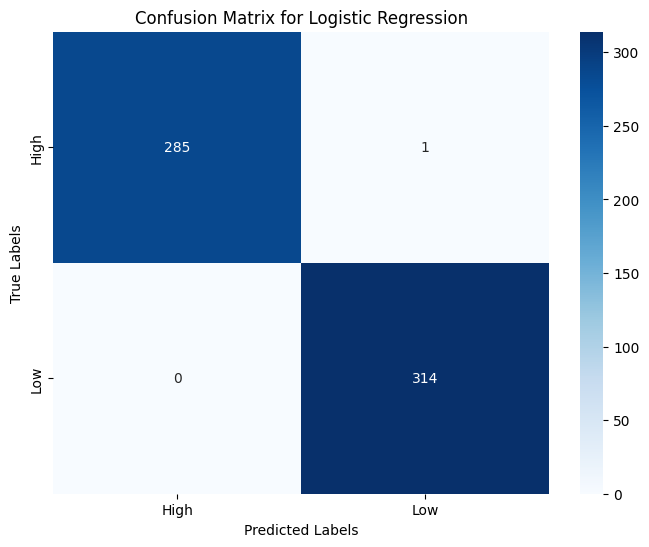

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import randint
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y = df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 201),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of each tree
    'min_samples_split': randint(2, 11),  # Minimum number of samples to split a node
    'min_samples_leaf': randint(1, 5),  # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up the RandomizedSearchCV for RandomForestClassifier
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations (random samples)
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,
    n_jobs=-1,  # Use all processors
    random_state=42
)

# Perform random search
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

# Train and evaluate with the best estimator (Random Forest with best hyperparameters)
best_rf_model = random_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

# Output the results
print("Best Parameters for RandomForest:", best_params_rf)
print("Best Cross-validation Score for RandomForest:", best_score_rf)
print("Test Set Accuracy with Best RandomForest Model:", accuracy_rf)
print("Classification Report with Best RandomForest Model:\n", report_rf)


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


#### 4. Light Gradient Boosting Machine


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.0 MB/s eta 0:00:00
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 1200, number of negative: 1200
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

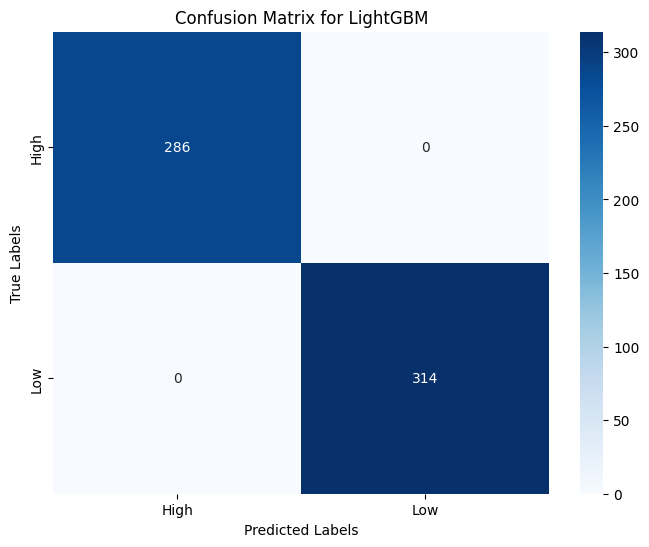

In [ ]:
!pip3 install lightgbm
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import numpy as np

# Load the dataset
df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
df['Density_Label'] = density_encoder.fit_transform(df['Density'])

# Define features and target variable
X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y = df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid for LightGBM
param_dist = {
    'num_leaves': [31, 50, 100, 200],  # Number of leaves in the tree
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinking
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'max_depth': [-1, 10, 20, 30],  # Maximum depth of the tree
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Fraction of features used for fitting trees
    'min_child_samples': [20, 30, 50]  # Minimum number of samples in a leaf
}

# Set up the RandomizedSearchCV for LightGBM
random_search_lgb = RandomizedSearchCV(
    lgb.LGBMClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of random samples to draw from the parameter grid
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Perform randomized search
random_search_lgb.fit(X_train, y_train)

# Best parameters and best score
best_params_lgb = random_search_lgb.best_params_
best_score_lgb = random_search_lgb.best_score_

# Train and evaluate with the best estimator (LightGBM with best hyperparameters)
best_lgb_model = random_search_lgb.best_estimator_
y_pred_lgb = best_lgb_model.predict(X_test)

# Evaluate the tuned LightGBM model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

# Output the results
print("Best Parameters for LightGBM:", best_params_lgb)
print("Best Cross-validation Score for LightGBM:", best_score_lgb)
print("Test Set Accuracy with Best LightGBM Model:", accuracy_lgb)
print("Classification Report with Best LightGBM Model:\n", report_lgb)

# Compute confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LightGBM')
plt.show()


####6. Neural Networks

Epoch 1/50
75/75 [==============================] - 1s 4ms/step - loss: 0.3486 - accuracy: 0.9137 - val_loss: 0.0658 - val_accuracy: 0.9950
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9767 - val_loss: 0.0261 - val_accuracy: 0.9983
Epoch 3/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9854 - val_loss: 0.0159 - val_accuracy: 0.9983
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9883 - val_loss: 0.0166 - val_accuracy: 0.9933
Epoch 5/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9912 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 8/50
75/75 [==

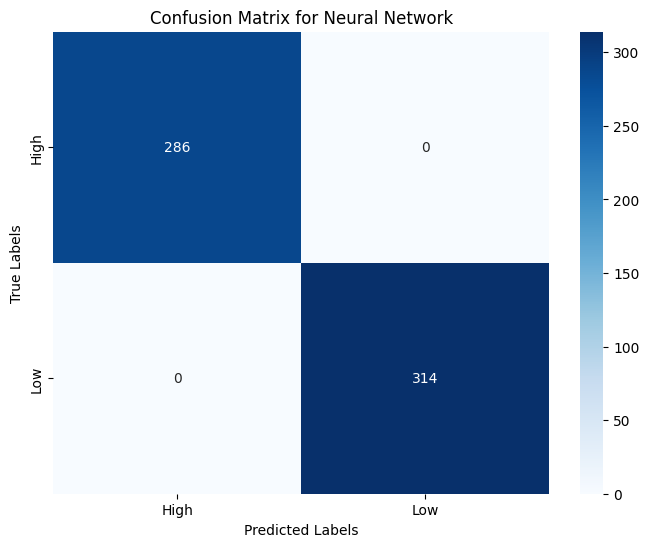

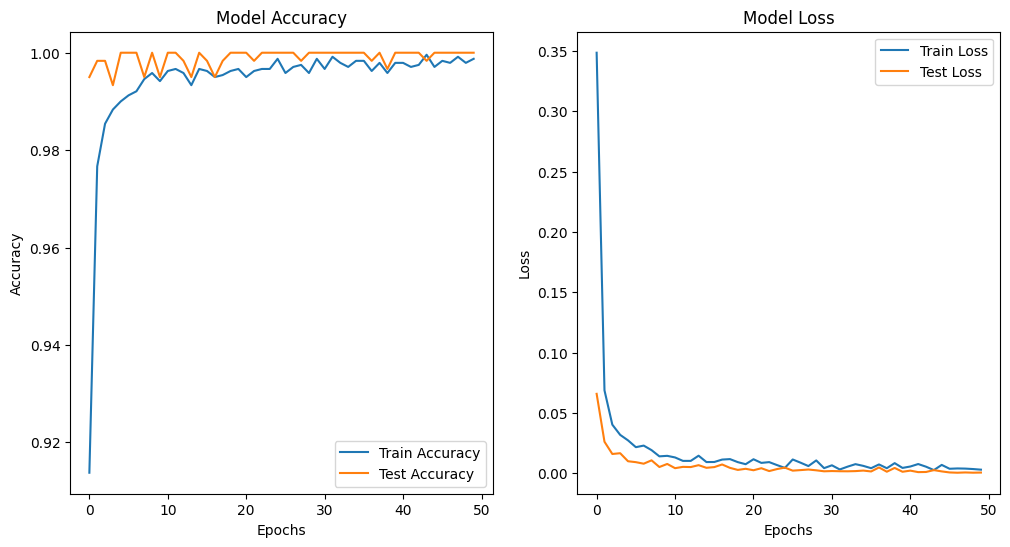

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model has been saved to /content/neural_network_model.h5 successfully!
19/19 [==============================] - 0s 1ms/step
Test Set Accuracy with Loaded Model: 1.0
Classification Report with Loaded Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



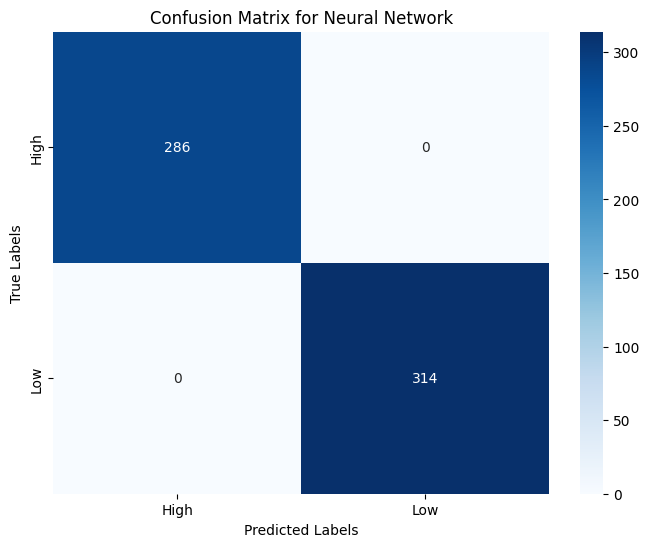

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Function to load the dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

# Function to encode categorical columns
def encode_columns(df):
    geohash_encoder = LabelEncoder()
    df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

    density_encoder = LabelEncoder()
    df['Density_Label'] = density_encoder.fit_transform(df['Density'])

    return df, geohash_encoder, density_encoder

# Function to split the dataset into features and target variable
def prepare_features_target(df):
    X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
    y = df['Density_Label']
    return X, y

# Function to scale features
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Function to split the data into training and testing sets
def split_data(X_scaled, y):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to build the neural network model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Function to train the model
def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return history

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, density_encoder):
    y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    report_nn = classification_report(y_test, y_pred_nn)

    print("Test Set Accuracy with Neural Network:", accuracy_nn)
    print("Classification Report with Neural Network:\n", report_nn)

    cm_nn = confusion_matrix(y_test, y_pred_nn)
    plot_confusion_matrix(cm_nn, density_encoder.classes_)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Neural Network')
    plt.show()

# Function to plot accuracy and loss curves
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Function to save the trained model
def save_model(model, model_path):
    model.save(model_path)
    print(f"Model has been saved to {model_path} successfully!")

# Function to load the model for predictions
def load_trained_model(model_path):
    return load_model(model_path)

# Function to use the loaded model for predictions
def predict_with_loaded_model(loaded_model, X_test):
    y_pred_loaded = (loaded_model.predict(X_test) > 0.5).astype("int32")
    return y_pred_loaded

# Function to evaluate the loaded model
def evaluate_loaded_model(loaded_model, X_test, y_test, density_encoder):
    y_pred_loaded = predict_with_loaded_model(loaded_model, X_test)
    accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
    report_loaded = classification_report(y_test, y_pred_loaded)

    print("Test Set Accuracy with Loaded Model:", accuracy_loaded)
    print("Classification Report with Loaded Model:\n", report_loaded)

    cm_loaded = confusion_matrix(y_test, y_pred_loaded)
    plot_confusion_matrix(cm_loaded, density_encoder.classes_)

# Main function to run the whole process
def main(file_path):
    # Step 1: Load the dataset
    df = load_dataset(file_path)

    # Step 2: Encode the categorical columns
    df, geohash_encoder, density_encoder = encode_columns(df)

    # Step 3: Prepare features and target
    X, y = prepare_features_target(df)

    # Step 4: Scale the features
    X_scaled, scaler = scale_features(X)

    # Step 5: Split the data into train and test sets
    X_train, X_test, y_train, y_test = split_data(X_scaled, y)

    # Step 6: Build the neural network model
    model = build_model(X_train.shape[1])

    # Step 7: Train the model
    history = train_model(model, X_train, y_train, X_test, y_test)

    # Step 8: Evaluate the model
    evaluate_model(model, X_test, y_test, density_encoder)

    # Step 9: Plot accuracy and loss curves
    plot_accuracy_loss(history)

    # Step 10: Save the trained model
    save_model(model, '/content/neural_network_model.h5')

    # Step 11: Load the trained model
    loaded_model = load_trained_model('/content/neural_network_model.h5')

    # Step 12: Evaluate the loaded model
    evaluate_loaded_model(loaded_model, X_test, y_test, density_encoder)

# Run the main function
main('/content/random_geohash_dataset.csv')


####Complex Architecture

Epoch 1/50
75/75 [==============================] - 3s 8ms/step - loss: 0.3577 - accuracy: 0.8283 - val_loss: 0.5186 - val_accuracy: 0.6950
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9254 - val_loss: 0.2707 - val_accuracy: 0.9217
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1448 - accuracy: 0.9417 - val_loss: 0.1541 - val_accuracy: 0.9600
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1599 - accuracy: 0.9346 - val_loss: 0.1524 - val_accuracy: 0.9533
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1340 - accuracy: 0.9471 - val_loss: 0.0854 - val_accuracy: 0.9717
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9458 - val_loss: 0.0395 - val_accuracy: 0.9950
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.0973 - accuracy: 0.9638 - val_loss: 0.0275 - val_accuracy: 0.9950
Epoch 8/50
75/75 [==

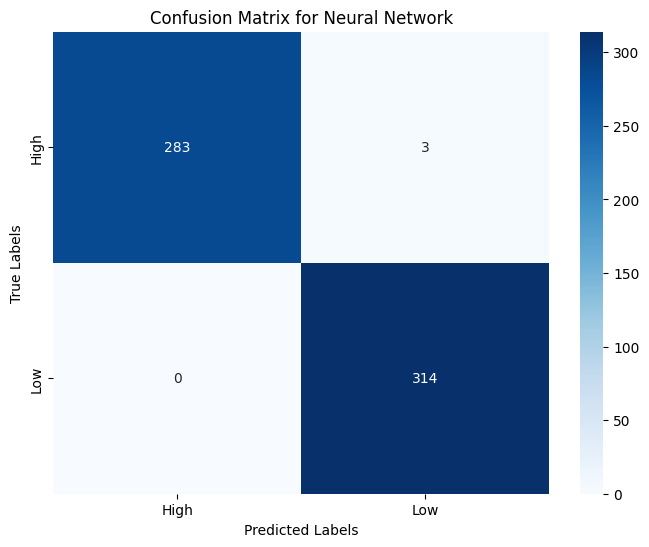

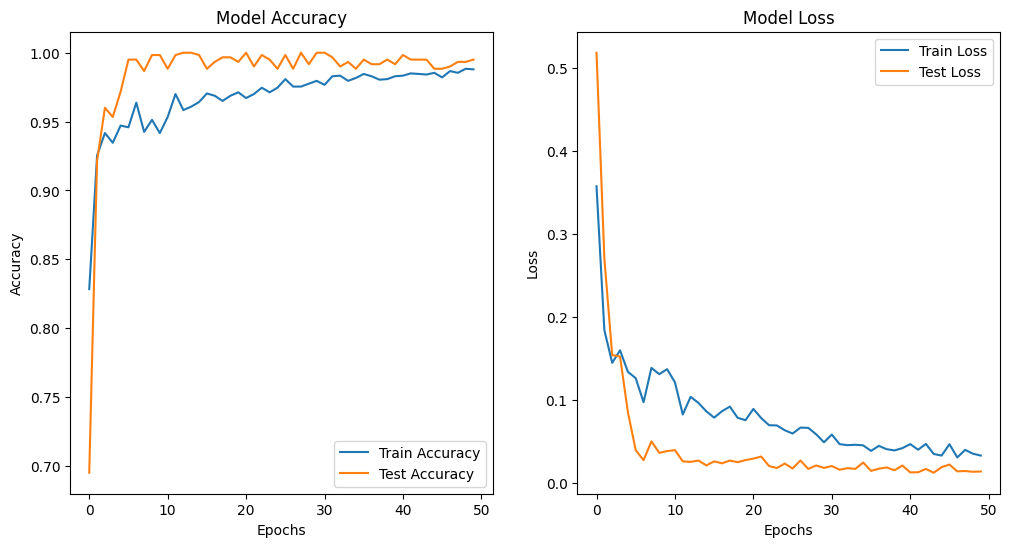

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model has been saved to complex_nn_model.h5 successfully!
19/19 [==============================] - 0s 2ms/step
Test Set Accuracy with Loaded Model: 0.995
Classification Report with Loaded Model:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       286
           1       0.99      1.00      1.00       314

    accuracy                           0.99       600
   macro avg       1.00      0.99      0.99       600
weighted avg       1.00      0.99      0.99       600



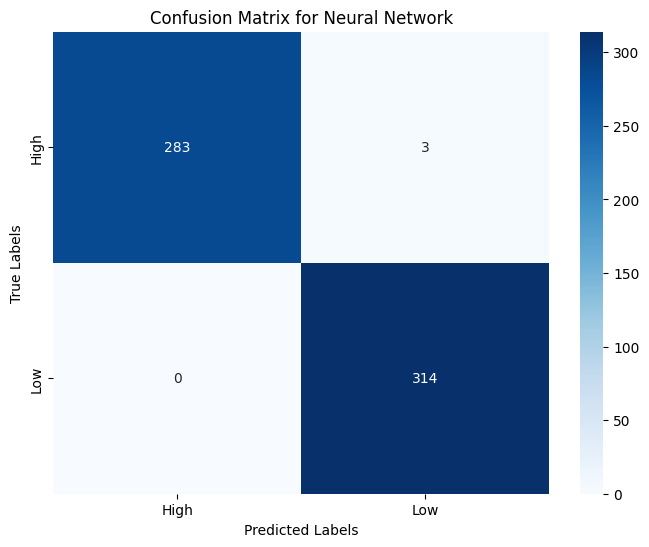

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# Function to load the dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path)
    return df

# Function to encode categorical columns
def encode_columns(df):
    geohash_encoder = LabelEncoder()
    df['Geohash_Encoded'] = geohash_encoder.fit_transform(df['Geohash'])

    density_encoder = LabelEncoder()
    df['Density_Label'] = density_encoder.fit_transform(df['Density'])

    return df, geohash_encoder, density_encoder

# Function to split the dataset into features and target variable
def prepare_features_target(df):
    X = df[['Geohash_Encoded', 'Message Count', 'Density Value']]
    y = df['Density_Label']
    return X, y

# Function to scale features
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Function to split the data into training and testing sets
def split_data(X_scaled, y):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Function to build a more complex neural network model
def build_complex_model(input_dim):
    model = Sequential()

    # Input layer: input_dim should match the number of features
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization for stable training
    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

    # Hidden layer 1
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization

    # Hidden layer 2
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization
    model.add(Dropout(0.5))  # Dropout to prevent overfitting

    # Hidden layer 3
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization

    # Hidden layer 4
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization

    # Hidden layer 5
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization

    # Output layer: Sigmoid for binary classification
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Function to train the model
def train_model(model, X_train, y_train, X_test, y_test):
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return history

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, density_encoder):
    y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
    accuracy_nn = accuracy_score(y_test, y_pred_nn)
    report_nn = classification_report(y_test, y_pred_nn)

    print("Test Set Accuracy with Neural Network:", accuracy_nn)
    print("Classification Report with Neural Network:\n", report_nn)

    cm_nn = confusion_matrix(y_test, y_pred_nn)
    plot_confusion_matrix(cm_nn, density_encoder.classes_)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, class_labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix for Neural Network')
    plt.show()

# Function to plot accuracy and loss curves
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Function to save the trained model
def save_model(model, model_path):
    model.save(model_path)
    print(f"Model has been saved to {model_path} successfully!")

# Function to load the model for predictions
def load_trained_model(model_path):
    return load_model(model_path)

# Function to use the loaded model for predictions
def predict_with_loaded_model(loaded_model, X_test):
    y_pred_loaded = (loaded_model.predict(X_test) > 0.5).astype("int32")
    return y_pred_loaded

# Function to evaluate the loaded model
def evaluate_loaded_model(loaded_model, X_test, y_test, density_encoder):
    y_pred_loaded = predict_with_loaded_model(loaded_model, X_test)
    accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
    report_loaded = classification_report(y_test, y_pred_loaded)

    print("Test Set Accuracy with Loaded Model:", accuracy_loaded)
    print("Classification Report with Loaded Model:\n", report_loaded)

    cm_loaded = confusion_matrix(y_test, y_pred_loaded)
    plot_confusion_matrix(cm_loaded, density_encoder.classes_)

# Main function to run the whole process
def main(file_path):
    # Step 1: Load the dataset
    df = load_dataset(file_path)

    # Step 2: Encode the categorical columns
    df, geohash_encoder, density_encoder = encode_columns(df)

    # Step 3: Prepare features and target
    X, y = prepare_features_target(df)

    # Step 4: Scale the features
    X_scaled, scaler = scale_features(X)

    # Step 5: Split the data into train and test sets
    X_train, X_test, y_train, y_test = split_data(X_scaled, y)

    # Step 6: Build the more complex neural network model
    model = build_complex_model(input_dim=X_train.shape[1])

    # Step 7: Train the model
    history = train_model(model, X_train, y_train, X_test, y_test)

    # Step 8: Evaluate the model
    evaluate_model(model, X_test, y_test, density_encoder)

    # Step 9: Plot accuracy and loss curves
    plot_accuracy_loss(history)

    # Step 10: Save the model
    save_model(model, 'complex_nn_model.h5')

    # Step 11: Load the trained model for predictions
    loaded_model = load_trained_model('complex_nn_model.h5')

    # Step 12: Evaluate the loaded model
    evaluate_loaded_model(loaded_model, X_test, y_test, density_encoder)

# Run the main function
main('/content/random_geohash_dataset.csv')


##### Load the Pickel model


Pre-trained model loaded successfully!
Test Set Accuracy with Retrained Model: 0.9983333333333333
Classification Report with Retrained Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       314

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



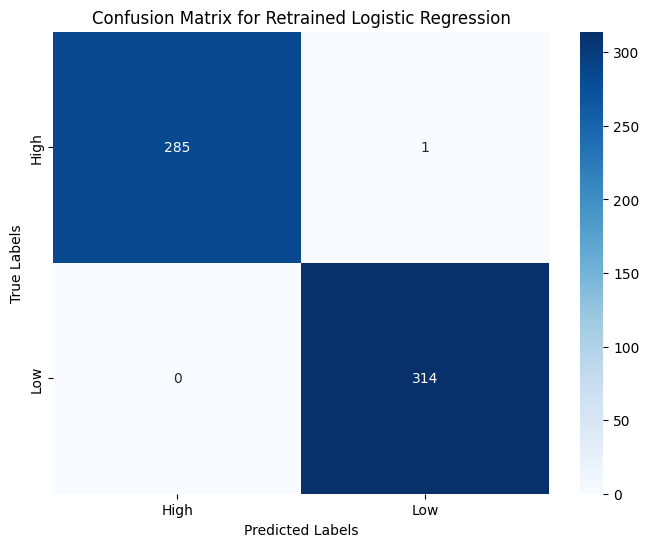

Retrained model has been saved successfully!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving and loading the model

# Load the new dataset
new_df = pd.read_csv('/content/random_geohash_dataset.csv')

# Encode the Geohash column using LabelEncoder (simplified approach)
geohash_encoder = LabelEncoder()
new_df['Geohash_Encoded'] = geohash_encoder.fit_transform(new_df['Geohash'])

# Encode the target variable ('Density') to binary labels
density_encoder = LabelEncoder()
new_df['Density_Label'] = density_encoder.fit_transform(new_df['Density'])

# Define features and target variable
X_new = new_df[['Geohash_Encoded', 'Message Count', 'Density Value']]
y_new = new_df['Density_Label']

# Standardize the features
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X_new)

# Split into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_scaled_new, y_new, test_size=0.2, random_state=42)

# Load the pre-trained model from the pickle file
try:
    loaded_model = joblib.load('logistic_regression_model.pkl')  # Loading the saved model
    print("Pre-trained model loaded successfully!")
except FileNotFoundError:
    print("Pre-trained model not found. Training a new model instead.")

# Continue training the loaded model with the new data
loaded_model.fit(X_train_new, y_train_new)

# Predict using the retrained model
y_pred_retrained = loaded_model.predict(X_test_new)

# Evaluate the retrained model
accuracy_retrained = accuracy_score(y_test_new, y_pred_retrained)
report_retrained = classification_report(y_test_new, y_pred_retrained)

# Output the results for the retrained model
print("Test Set Accuracy with Retrained Model:", accuracy_retrained)
print("Classification Report with Retrained Model:\n", report_retrained)

# Compute confusion matrix
cm_retrained = confusion_matrix(y_test_new, y_pred_retrained)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_retrained, annot=True, fmt='d', cmap='Blues', xticklabels=density_encoder.classes_, yticklabels=density_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Retrained Logistic Regression')
plt.show()

# Save the retrained model to the pickle file again
joblib.dump(loaded_model, 'logistic_regression_model.pkl')
print("Retrained model has been saved successfully!")


In [48]:
pip install geohash

In [45]:
pip install pandas


In [47]:

import random
import pandas as pd
import geohash
import numpy as np
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# 1. Generate Random Dataset

# Parameters
num_rows = 3000
geohash_length = 5  # Length of geohash
geohash_lat_range = (37.0, 38.0)  # Latitude range
geohash_lon_range = (-122.0, -121.0)  # Longitude range
density_labels = ['high', 'low']

# Generate random geohashes and other data
data = []

for _ in range(num_rows):
    # Random geohash (latitude and longitude between the defined ranges)
    lat = random.uniform(*geohash_lat_range)
    lon = random.uniform(*geohash_lon_range)
    geohash_value = geohash.encode(lat, lon, precision=geohash_length)

    # Random message count
    message_count = random.randint(1, 1000)

    # Random density label (high or low)
    density = random.choice(density_labels)

    # Append data
    data.append([geohash_value, message_count, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['geohash', 'message_count', 'density'])

# 2. Preprocess the Data

# Encode the 'density' label into numeric values
label_encoder = LabelEncoder()
df['density'] = label_encoder.fit_transform(df['density'])

# Features and target
X = df[['message_count']]
y = df['density']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Hyperparameter Tuning and Model Training (SVM)

# Model initialization (SVM classifier)
model = SVC()

# Hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # We use both linear and RBF kernels
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# 4. Save the Model and Scaler

# Save the model
with open('svm_density_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# 5. Prediction Function

def predict_density(model_pickle_file, scaler_pickle_file, geohash_value):
    # Load the model and scaler from pickle files
    with open(model_pickle_file, 'rb') as f:
        model = pickle.load(f)

    with open(scaler_pickle_file, 'rb') as f:
        scaler = pickle.load(f)

    # Decode the geohash into latitude and longitude (using geohash library)
    lat, lon = geohash.decode(geohash_value)

    # Simulate message_count based on geohash (random message count for this demo)
    message_count = random.randint(1, 1000)

    # Preprocess the feature (message_count)
    feature = scaler.transform([[message_count]])

    # Predict the density
    prediction = model.predict(feature)

    # Convert the prediction back to the original label (high/low)
    density_label = label_encoder.inverse_transform(prediction)

    return density_label[0]

# Example usage
geohash_value = '9q8yy'  # Example geohash
predicted_density = predict_density('svm_density_model.pkl', 'scaler.pkl', geohash_value)
print(f'Predicted Density: {predicted_density}')


ModuleNotFoundError: No module named 'geohash'